In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# TASK 1
# TODO - MERGE ALL 12 FILES INTO ONE FILE

path = '/home/adarshanand67/Desktop/Pandas-Data-Science-Tasks-master/Sales_Data' # use your path
files = os.listdir(path) # create a list of files in directory
print(files)
os.chdir(path) # change directory to path
os.getcwd() # get current working directory

['Sales_January_2019.csv', 'Sales_December_2019.csv', 'Sales_November_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_October_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_May_2019.csv', 'Sales_April_2019.csv', 'Sales_September_2019.csv']


'/home/adarshanand67/Desktop/Pandas-Data-Science-Tasks-master/Sales_Data'

In [4]:
df = pd.DataFrame() # Empty dataframe

for file in files:
    tempDf = pd.read_csv(path + '/' + file) # read each file, convert to dataframe
    df = pd.concat([df, tempDf], ignore_index=True) # Concatenate all dataframes
    
df.to_csv('/home/adarshanand67/Desktop/Pandas-Data-Science-Tasks-master/Final_Sales_Data.csv') # Save the dataframe to csv
df.head() # Check the first 5 rows
# ! TASK 1 - END

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
# TASK 2
# TODO - What was the best month for sales? How many sales were there in the best month?
# ? Add additional colums to get more insight on a particular key (here month)

df['Month'] = df['Order Date'].str.split('/').str[0] # Adding a new column with month

In [6]:
df.head() # Check the first 5 rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [7]:
def intToMonth(month):
    '''
    Convert month number to month name
    '''
    if month == '01':
        return 'January'
    elif month == '02':
        return 'February'
    elif month == '03':
        return 'March'
    elif month == '04':
        return 'April'
    elif month == '05':
        return 'May'
    elif month == '06':
        return 'June'
    elif month == '07':
        return 'July'
    elif month == '08':
        return 'August'
    elif month == '09':
        return 'September'
    elif month == '10':
        return 'October'
    elif month == '11':
        return 'November'
    elif month == '12':
        return 'December'

In [8]:
df['Month'] = df['Month'].apply(intToMonth) # Convert month number to month name

In [9]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September


In [10]:
# Drop all nan values (Remove rows with any one nan values)
df = df.dropna()

In [11]:
# 2.1 ? Easy solution - Count the number of sales in each month
countOfitems = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}

priceOfitems = {"January": 0, "February": 0, "March": 0, "April": 0, "May": 0, "June": 0, "July": 0, "August": 0, "September": 0, "October": 0, "November": 0, "December": 0}

for i in range(len(df)): # Iterate over all rows (might be slow)
    month = df.iloc[i]['Month']
    cost = float(df.iloc[i]['Quantity Ordered']) * float(df.iloc[0]['Price Each'])
    countOfitems[month] += 1
    priceOfitems[month] += cost
    
countOfitems

{'January': 9709,
 'February': 11975,
 'March': 15153,
 'April': 18279,
 'May': 16566,
 'June': 13554,
 'July': 14293,
 'August': 11961,
 'September': 11621,
 'October': 20282,
 'November': 17573,
 'December': 24984}

In [12]:
priceOfitems

{'January': 7632100.0,
 'February': 9414300.0,
 'March': 11903500.0,
 'April': 14390600.0,
 'May': 13066900.0,
 'June': 10677100.0,
 'July': 11250400.0,
 'August': 9413600.0,
 'September': 9176300.0,
 'October': 15892100.0,
 'November': 13858600.0,
 'December': 19679800.0}

In [13]:
# Max sales month
maxSalesMonth = max(countOfitems, key=countOfitems.get)
price = priceOfitems[maxSalesMonth]

# Format the price with commas
price = "{:,}".format(price)

print("The best month for sales is: ", maxSalesMonth, " with sale of ", countOfitems[maxSalesMonth], " items" , 'worth $', price)

# TASK 2 - END


The best month for sales is:  December  with sale of  24984  items worth $ 19,679,800.0


In [14]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September


In [15]:
# Add sales column
# make quantity ordered,price column as float
df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)
df['Price Each'] = df['Price Each'].astype(float)

df['Sales'] = df['Quantity Ordered'] * df['Price Each']

/tmp/ipykernel_58227/1584780860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)
/tmp/ipykernel_58227/1584780860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = df['Price Each'].astype(float)
/tmp/ipykernel_58227/1584780860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [16]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January,700.00
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January,14.95
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January,23.98
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January,149.99
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September,8.97
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September,700.00
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September,379.99


In [17]:
# Reorder the sales column besides price each
col = df.columns.tolist()
# swap columns - Sales , order date
col[-1],col[-4] = col[-4],col[-1]
df = df[col]
df.head()   


,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date
0,141234,iPhone,1.0,700.00,700.00,"944 Walnut St, Boston, MA 02215",January,01/22/19 21:25
1,141235,Lightning Charging Cable,1.0,14.95,14.95,"185 Maple St, Portland, OR 97035",January,01/28/19 14:15
2,141236,Wired Headphones,2.0,11.99,23.98,"538 Adams St, San Francisco, CA 94016",January,01/17/19 13:33
3,141237,27in FHD Monitor,1.0,149.99,149.99,"738 10th St, Los Angeles, CA 90001",January,01/05/19 20:33
4,141238,Wired Headphones,1.0,11.99,11.99,"387 10th St, Austin, TX 73301",January,01/25/19 11:59


In [18]:
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date
0,141234,iPhone,1.0,700.00,700.00,"944 Walnut St, Boston, MA 02215",January,01/22/19 21:25
1,141235,Lightning Charging Cable,1.0,14.95,14.95,"185 Maple St, Portland, OR 97035",January,01/28/19 14:15
2,141236,Wired Headphones,2.0,11.99,23.98,"538 Adams St, San Francisco, CA 94016",January,01/17/19 13:33
3,141237,27in FHD Monitor,1.0,149.99,149.99,"738 10th St, Los Angeles, CA 90001",January,01/05/19 20:33
4,141238,Wired Headphones,1.0,11.99,11.99,"387 10th St, Austin, TX 73301",January,01/25/19 11:59
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,8.97,"840 Highland St, Los Angeles, CA 90001",September,09/17/19 20:56
186846,259354,iPhone,1.0,700.00,700.00,"216 Dogwood St, San Francisco, CA 94016",September,09/01/19 16:00
186847,259355,iPhone,1.0,700.00,700.00,"220 12th St, San Francisco, CA 94016",September,09/23/19 07:39
186848,259356,34in Ultrawide Monitor,1.0,379.99,379.99,"511 Forest St, San Francisco, CA 94016",September,09/19/19 17:30


In [19]:
# 2.2 ? Pandas solution - Using groupby 
group = df.groupby('Month').sum()
# sort it by month 
group = group.sort_values(by='Sales', ascending=False)
group

,Quantity Ordered,Price Each,Sales
Month,,,
December,28114.0,4588415.41,4613443.34
October,22703.0,3715554.83,3736726.88
April,20558.0,3367671.02,3390670.24
November,19798.0,3180600.68,3199603.20
May,18667.0,3135125.13,3152606.75
March,17005.0,2791207.83,2807100.38
July,16072.0,2632539.56,2647775.76
June,15253.0,2562025.61,2577802.26
August,13448.0,2230345.42,2244467.88


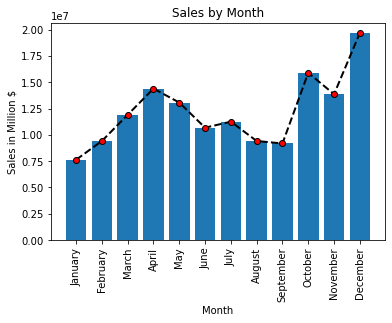

In [20]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

price = [priceOfitems[month] for month in months]

plt.bar(months,price)
# rotate the x-axis labels
plt.xticks(rotation=90)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales in Million $')

# Line chart 
plt.plot(months,price,color='black',linewidth=2,linestyle='dashed',marker='o',markerfacecolor='red',markersize=6)

plt.show()

In [21]:
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date
0,141234,iPhone,1.0,700.00,700.00,"944 Walnut St, Boston, MA 02215",January,01/22/19 21:25
1,141235,Lightning Charging Cable,1.0,14.95,14.95,"185 Maple St, Portland, OR 97035",January,01/28/19 14:15
2,141236,Wired Headphones,2.0,11.99,23.98,"538 Adams St, San Francisco, CA 94016",January,01/17/19 13:33
3,141237,27in FHD Monitor,1.0,149.99,149.99,"738 10th St, Los Angeles, CA 90001",January,01/05/19 20:33
4,141238,Wired Headphones,1.0,11.99,11.99,"387 10th St, Austin, TX 73301",January,01/25/19 11:59
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,8.97,"840 Highland St, Los Angeles, CA 90001",September,09/17/19 20:56
186846,259354,iPhone,1.0,700.00,700.00,"216 Dogwood St, San Francisco, CA 94016",September,09/01/19 16:00
186847,259355,iPhone,1.0,700.00,700.00,"220 12th St, San Francisco, CA 94016",September,09/23/19 07:39
186848,259356,34in Ultrawide Monitor,1.0,379.99,379.99,"511 Forest St, San Francisco, CA 94016",September,09/19/19 17:30


In [22]:
# TASK 3
# TODO - Which city had the highest sales?

# Add city column
df['City'] = df['Purchase Address'].str.split(',').str[-2]
df

/tmp/ipykernel_58227/788614240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].str.split(',').str[-2]


,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City
0,141234,iPhone,1.0,700.00,700.00,"944 Walnut St, Boston, MA 02215",January,01/22/19 21:25,Boston
1,141235,Lightning Charging Cable,1.0,14.95,14.95,"185 Maple St, Portland, OR 97035",January,01/28/19 14:15,Portland
2,141236,Wired Headphones,2.0,11.99,23.98,"538 Adams St, San Francisco, CA 94016",January,01/17/19 13:33,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,149.99,"738 10th St, Los Angeles, CA 90001",January,01/05/19 20:33,Los Angeles
4,141238,Wired Headphones,1.0,11.99,11.99,"387 10th St, Austin, TX 73301",January,01/25/19 11:59,Austin
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,8.97,"840 Highland St, Los Angeles, CA 90001",September,09/17/19 20:56,Los Angeles
186846,259354,iPhone,1.0,700.00,700.00,"216 Dogwood St, San Francisco, CA 94016",September,09/01/19 16:00,San Francisco
186847,259355,iPhone,1.0,700.00,700.00,"220 12th St, San Francisco, CA 94016",September,09/23/19 07:39,San Francisco
186848,259356,34in Ultrawide Monitor,1.0,379.99,379.99,"511 Forest St, San Francisco, CA 94016",September,09/19/19 17:30,San Francisco


In [23]:
cityGroup = df.groupby('City').sum()
cityGroup

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602.0,2779908.20,2795498.58
Austin,11153.0,1809873.61,1819581.75
Boston,22528.0,3637409.77,3661642.01
Dallas,16730.0,2752627.82,2767975.40
Los Angeles,33289.0,5421435.23,5452570.80
New York City,27932.0,4635370.83,4664317.43
Portland,14053.0,2307747.47,2320490.61
San Francisco,50239.0,8211461.74,8262203.91
Seattle,16553.0,2733296.01,2747755.48


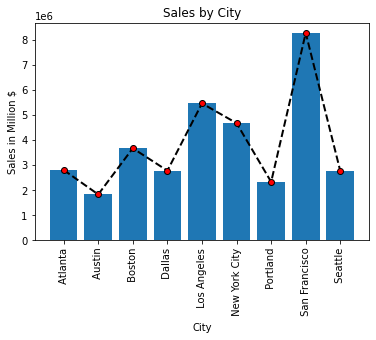

In [24]:
plt.bar(cityGroup.index,cityGroup['Sales'])
plt.xticks(rotation=90)
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Sales in Million $')

# Line chart 
plt.plot(cityGroup.index,cityGroup['Sales'],color='black',linewidth=2,linestyle='dashed',marker='o',markerfacecolor='red',markersize=6)

plt.show()

In [25]:
print("The city with highest sales is: ", cityGroup.idxmax()[-1])

The city with highest sales is:   San Francisco


In [26]:
# TASK 4 
# TODO - WHAT TIME SHOULD WE DISPLAY THE ADVERTISEMENT TO MAXIMIZE SALES?
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City
0,141234,iPhone,1.0,700.00,700.00,"944 Walnut St, Boston, MA 02215",January,01/22/19 21:25,Boston
1,141235,Lightning Charging Cable,1.0,14.95,14.95,"185 Maple St, Portland, OR 97035",January,01/28/19 14:15,Portland
2,141236,Wired Headphones,2.0,11.99,23.98,"538 Adams St, San Francisco, CA 94016",January,01/17/19 13:33,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,149.99,"738 10th St, Los Angeles, CA 90001",January,01/05/19 20:33,Los Angeles
4,141238,Wired Headphones,1.0,11.99,11.99,"387 10th St, Austin, TX 73301",January,01/25/19 11:59,Austin
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,8.97,"840 Highland St, Los Angeles, CA 90001",September,09/17/19 20:56,Los Angeles
186846,259354,iPhone,1.0,700.00,700.00,"216 Dogwood St, San Francisco, CA 94016",September,09/01/19 16:00,San Francisco
186847,259355,iPhone,1.0,700.00,700.00,"220 12th St, San Francisco, CA 94016",September,09/23/19 07:39,San Francisco
186848,259356,34in Ultrawide Monitor,1.0,379.99,379.99,"511 Forest St, San Francisco, CA 94016",September,09/19/19 17:30,San Francisco


In [27]:
from datetime import datetime # Date time is very useful for time related operations

In [28]:
# Aggregate the order date by 24 hour period

df['Order Date'] = pd.to_datetime(df['Order Date'])

/tmp/ipykernel_58227/2847436988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [29]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [30]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City
0,141234,iPhone,1.0,700.00,700.00,"944 Walnut St, Boston, MA 02215",January,2019-01-22 21:25:00,Boston
1,141235,Lightning Charging Cable,1.0,14.95,14.95,"185 Maple St, Portland, OR 97035",January,2019-01-28 14:15:00,Portland
2,141236,Wired Headphones,2.0,11.99,23.98,"538 Adams St, San Francisco, CA 94016",January,2019-01-17 13:33:00,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,149.99,"738 10th St, Los Angeles, CA 90001",January,2019-01-05 20:33:00,Los Angeles
4,141238,Wired Headphones,1.0,11.99,11.99,"387 10th St, Austin, TX 73301",January,2019-01-25 11:59:00,Austin


In [31]:
df['Hour'] = df['Order Date'].dt.hour

/tmp/ipykernel_58227/3597640911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour


In [32]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City,Hour
0,141234,iPhone,1.0,700.00,700.00,"944 Walnut St, Boston, MA 02215",January,2019-01-22 21:25:00,Boston,21
1,141235,Lightning Charging Cable,1.0,14.95,14.95,"185 Maple St, Portland, OR 97035",January,2019-01-28 14:15:00,Portland,14
2,141236,Wired Headphones,2.0,11.99,23.98,"538 Adams St, San Francisco, CA 94016",January,2019-01-17 13:33:00,San Francisco,13
3,141237,27in FHD Monitor,1.0,149.99,149.99,"738 10th St, Los Angeles, CA 90001",January,2019-01-05 20:33:00,Los Angeles,20
4,141238,Wired Headphones,1.0,11.99,11.99,"387 10th St, Austin, TX 73301",January,2019-01-25 11:59:00,Austin,11


In [33]:
hourGroup = df.groupby('Hour').sum()
hourGroup

,Quantity Ordered,Price Each,Sales
Hour,,,
0,4428.0,709296.70,713721.27
1,2619.0,458490.00,460866.88
2,1398.0,233833.64,234851.44
3,928.0,144726.42,145757.89
4,937.0,162058.18,162661.01
5,1493.0,229621.21,230679.82
6,2810.0,445000.11,448113.00
7,4556.0,740568.11,744854.12
8,7002.0,1185970.62,1192348.97


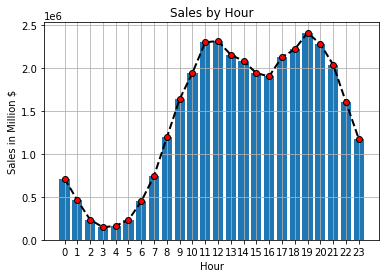

In [34]:
plt.bar(hourGroup.index,hourGroup['Sales'])
plt.xticks(hourGroup.index,hourGroup.index)
plt.title('Sales by Hour')
plt.xlabel('Hour')
plt.ylabel('Sales in Million $')


plt.plot(hourGroup.index,hourGroup['Sales'],color='black',linewidth=2,linestyle='dashed',marker='o',markerfacecolor='red',markersize=6)
# grid
plt.grid(True)
plt.show()

In [35]:
# Answer -  Advertise at the time - 11:00 AM and 7:00 PM

In [36]:
# TASK 5.1
# TODO 1 - What is the highest sold product?
# TODO 2 - What products are sold together?
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City,Hour
0,141234,iPhone,1.0,700.00,700.00,"944 Walnut St, Boston, MA 02215",January,2019-01-22 21:25:00,Boston,21
1,141235,Lightning Charging Cable,1.0,14.95,14.95,"185 Maple St, Portland, OR 97035",January,2019-01-28 14:15:00,Portland,14
2,141236,Wired Headphones,2.0,11.99,23.98,"538 Adams St, San Francisco, CA 94016",January,2019-01-17 13:33:00,San Francisco,13
3,141237,27in FHD Monitor,1.0,149.99,149.99,"738 10th St, Los Angeles, CA 90001",January,2019-01-05 20:33:00,Los Angeles,20
4,141238,Wired Headphones,1.0,11.99,11.99,"387 10th St, Austin, TX 73301",January,2019-01-25 11:59:00,Austin,11
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,8.97,"840 Highland St, Los Angeles, CA 90001",September,2019-09-17 20:56:00,Los Angeles,20
186846,259354,iPhone,1.0,700.00,700.00,"216 Dogwood St, San Francisco, CA 94016",September,2019-09-01 16:00:00,San Francisco,16
186847,259355,iPhone,1.0,700.00,700.00,"220 12th St, San Francisco, CA 94016",September,2019-09-23 07:39:00,San Francisco,7
186848,259356,34in Ultrawide Monitor,1.0,379.99,379.99,"511 Forest St, San Francisco, CA 94016",September,2019-09-19 17:30:00,San Francisco,17


In [37]:
prodGroup = df.groupby('Product').sum()
prodGroup.columns

columns = prodGroup.columns.tolist()
# remove hour column

columns.remove('Hour')
columns.remove('Quantity Ordered')
columns.remove('Price Each')

prodGroup = prodGroup[columns]
prodGroup

,Sales
Product,
20in Monitor,454148.71
27in 4K Gaming Monitor,2435097.56
27in FHD Monitor,1132424.50
34in Ultrawide Monitor,2355558.01
AA Batteries (4-pack),106118.40
AAA Batteries (4-pack),92740.83
Apple Airpods Headphones,2349150.00
Bose SoundSport Headphones,1345565.43
Flatscreen TV,1445700.00


In [38]:
# Sort all items by sales
items = prodGroup.sort_values(by='Sales', ascending=False)
items = list(items.index)
items

['Macbook Pro Laptop',
 'iPhone',
 'ThinkPad Laptop',
 'Google Phone',
 '27in 4K Gaming Monitor',
 '34in Ultrawide Monitor',
 'Apple Airpods Headphones',
 'Flatscreen TV',
 'Bose SoundSport Headphones',
 '27in FHD Monitor',
 'Vareebadd Phone',
 '20in Monitor',
 'LG Washing Machine',
 'LG Dryer',
 'Lightning Charging Cable',
 'USB-C Charging Cable',
 'Wired Headphones',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)']

In [39]:
highestSaleProduct = prodGroup.idxmax()[-1]
print("The highest sold product is: ", highestSaleProduct)

The highest sold product is:  Macbook Pro Laptop


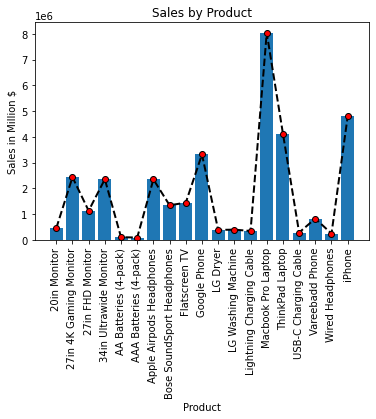

In [40]:
plt.bar(prodGroup.index,prodGroup['Sales'])
plt.xticks(prodGroup.index,prodGroup.index,rotation=90)
plt.title('Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales in Million $')
plt.plot(prodGroup.index,prodGroup['Sales'],color='black',linewidth=2,linestyle='dashed',marker='o',markerfacecolor='red',markersize=6)
plt.show()

In [41]:
print("Order of the sale of the product: ", prodGroup.sort_values(by='Sales', ascending=False).index.tolist())

Order of the sale of the product:  ['Macbook Pro Laptop', 'iPhone', 'ThinkPad Laptop', 'Google Phone', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Apple Airpods Headphones', 'Flatscreen TV', 'Bose SoundSport Headphones', '27in FHD Monitor', 'Vareebadd Phone', '20in Monitor', 'LG Washing Machine', 'LG Dryer', 'Lightning Charging Cable', 'USB-C Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)']


In [42]:
# Find the products that are sold together
# Find duplicate IDs
newdf = df[df['Order ID'].duplicated(keep=False)] # Extract the duplicate rows
newdf

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City,Hour
41,141275,USB-C Charging Cable,1.0,11.95,11.95,"610 Walnut St, Austin, TX 73301",January,2019-01-07 16:06:00,Austin,16
42,141275,Wired Headphones,1.0,11.99,11.99,"610 Walnut St, Austin, TX 73301",January,2019-01-07 16:06:00,Austin,16
57,141290,Apple Airpods Headphones,1.0,150.00,150.00,"4 1st St, Los Angeles, CA 90001",January,2019-01-02 08:25:00,Los Angeles,8
58,141290,AA Batteries (4-pack),3.0,3.84,11.52,"4 1st St, Los Angeles, CA 90001",January,2019-01-02 08:25:00,Los Angeles,8
133,141365,Vareebadd Phone,1.0,400.00,400.00,"20 Dogwood St, New York City, NY 10001",January,2019-01-10 11:19:00,New York City,11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,3.84,"106 7th St, Atlanta, GA 30301",September,2019-09-20 20:18:00,Atlanta,20
186803,259314,Wired Headphones,1.0,11.99,11.99,"241 Highland St, Atlanta, GA 30301",September,2019-09-16 00:25:00,Atlanta,0
186804,259314,AAA Batteries (4-pack),2.0,2.99,5.98,"241 Highland St, Atlanta, GA 30301",September,2019-09-16 00:25:00,Atlanta,0
186841,259350,Google Phone,1.0,600.00,600.00,"519 Maple St, San Francisco, CA 94016",September,2019-09-30 13:49:00,San Francisco,13


In [43]:
# Group by order id

newdf['Grouped'] = newdf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
newdf

/tmp/ipykernel_58227/1033631366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Grouped'] = newdf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City,Hour,Grouped
41,141275,USB-C Charging Cable,1.0,11.95,11.95,"610 Walnut St, Austin, TX 73301",January,2019-01-07 16:06:00,Austin,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1.0,11.99,11.99,"610 Walnut St, Austin, TX 73301",January,2019-01-07 16:06:00,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1.0,150.00,150.00,"4 1st St, Los Angeles, CA 90001",January,2019-01-02 08:25:00,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3.0,3.84,11.52,"4 1st St, Los Angeles, CA 90001",January,2019-01-02 08:25:00,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1.0,400.00,400.00,"20 Dogwood St, New York City, NY 10001",January,2019-01-10 11:19:00,New York City,11,"Vareebadd Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,3.84,"106 7th St, Atlanta, GA 30301",September,2019-09-20 20:18:00,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1.0,11.99,11.99,"241 Highland St, Atlanta, GA 30301",September,2019-09-16 00:25:00,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2.0,2.99,5.98,"241 Highland St, Atlanta, GA 30301",September,2019-09-16 00:25:00,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1.0,600.00,600.00,"519 Maple St, San Francisco, CA 94016",September,2019-09-30 13:49:00,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [44]:
newdf

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City,Hour,Grouped
41,141275,USB-C Charging Cable,1.0,11.95,11.95,"610 Walnut St, Austin, TX 73301",January,2019-01-07 16:06:00,Austin,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1.0,11.99,11.99,"610 Walnut St, Austin, TX 73301",January,2019-01-07 16:06:00,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1.0,150.00,150.00,"4 1st St, Los Angeles, CA 90001",January,2019-01-02 08:25:00,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3.0,3.84,11.52,"4 1st St, Los Angeles, CA 90001",January,2019-01-02 08:25:00,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1.0,400.00,400.00,"20 Dogwood St, New York City, NY 10001",January,2019-01-10 11:19:00,New York City,11,"Vareebadd Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,3.84,"106 7th St, Atlanta, GA 30301",September,2019-09-20 20:18:00,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1.0,11.99,11.99,"241 Highland St, Atlanta, GA 30301",September,2019-09-16 00:25:00,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2.0,2.99,5.98,"241 Highland St, Atlanta, GA 30301",September,2019-09-16 00:25:00,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1.0,600.00,600.00,"519 Maple St, San Francisco, CA 94016",September,2019-09-30 13:49:00,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [45]:
# Remove the duplicate rows
newdf = newdf[['Grouped']].drop_duplicates()
newdf.reset_index(drop=True, inplace=True)
newdf

,Grouped
0,"USB-C Charging Cable,Wired Headphones"
1,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,"Vareebadd Phone,Wired Headphones"
3,"Google Phone,USB-C Charging Cable"
4,"Google Phone,Bose SoundSport Headphones"
...,...
361,"27in FHD Monitor,iPhone"
362,"Vareebadd Phone,Lightning Charging Cable"
363,"LG Dryer,Lightning Charging Cable"
364,"ThinkPad Laptop,LG Dryer"
